# QAE

QAE tests in Qiskit inspired by [Romero et al](https://arxiv.org/pdf/1612.02806.pdf) and [Sim et al](https://arxiv.org/pdf/1810.10576.pdf).\

## Parameter Scan Test

Theta: -3.141592653589793	 Loss: -0.0
Theta: -2.9249310912732556	 Loss: -0.006591796875
Theta: -2.708269528956718	 Loss: -0.02294921875
Theta: -2.4916079666401805	 Loss: -0.056884765625
Theta: -2.2749464043236434	 Loss: -0.105712890625
Theta: -2.058284842007106	 Loss: -0.162841796875
Theta: -1.8416232796905683	 Loss: -0.24169921875
Theta: -1.624961717374031	 Loss: -0.356201171875
Theta: -1.4083001550574934	 Loss: -0.45849609375
Theta: -1.1916385927409558	 Loss: -0.58056640625
Theta: -0.9749770304244185	 Loss: -0.68603515625
Theta: -0.758315468107881	 Loss: -0.8037109375
Theta: -0.5416539057913434	 Loss: -0.889892578125
Theta: -0.3249923434748059	 Loss: -0.960693359375
Theta: -0.10833078115826877	 Loss: -0.995849609375
Theta: 0.10833078115826877	 Loss: -0.995849609375
Theta: 0.3249923434748063	 Loss: -0.95947265625
Theta: 0.5416539057913439	 Loss: -0.890869140625
Theta: 0.7583154681078814	 Loss: -0.80517578125
Theta: 0.9749770304244185	 Loss: -0.685791015625
Theta: 1.191638592740956	 Lo

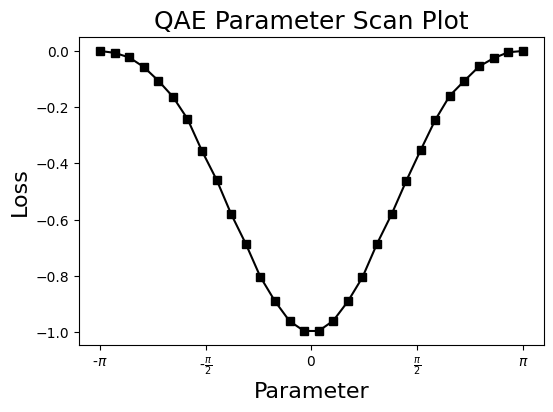

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

angles = np.linspace(-np.pi, np.pi, 30)
losses = []

simulator = AerSimulator()

for theta in angles:
    qc = QuantumCircuit(2, 2)  # 2 qubits, 2 classical bits
    qc.ry(np.pi/4, 0)
    qc.cx(0,1)
    qc.barrier()
    qc.ry(theta, 1)
    qc.cx(0,1)
    
    inverse_qc = qc.inverse()
    
    qc.barrier()
    qc.reset(1)
    
    qc.compose(inverse_qc, inplace=True)
    
    qc.measure([0,1], [0,1])  # Measure both qubits
    
    # Direct simulation
    job = simulator.run(qc, shots=4096)
    result = job.result()
    counts = result.get_counts(qc)
    
    # Calculate loss
    loss = counts.get('00', 0)/4096 * -1
    losses.append(loss)
    print(f"Theta: {theta}\t Loss: {loss}")

plt.figure(figsize=(6, 4))
plt.plot(angles, losses, 'ks-')
plt.title("QAE Parameter Scan Plot", fontsize=18)
plt.xlabel("Parameter", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.xticks([-np.pi, -np.pi/2., 0., np.pi/2., np.pi],
           [r"-$\pi$", r"-$\frac{\pi}{2}$", "$0$", r"$\frac{\pi}{2}$", r"$\pi$"])
plt.show()

## Minimisation Test

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 2
         Function evaluations: 27


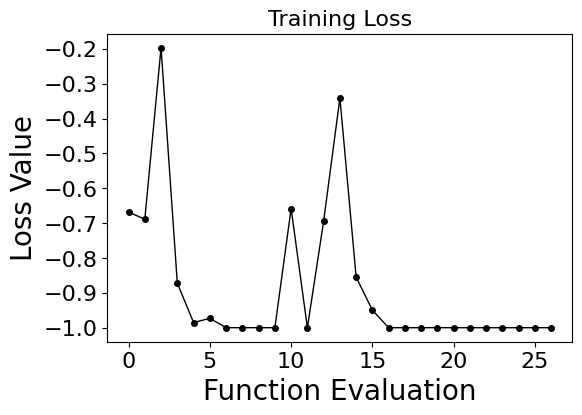

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import scipy.optimize as sp

def f(x):
    qc = QuantumCircuit(2, 2)
    qc.ry(np.pi/4, 0)
    qc.cx(0,1)
    qc.barrier()
    qc.ry(x[0], 1)
    qc.cx(0,1)
    
    inverse_qc = qc.inverse()
    
    qc.barrier()
    qc.reset(1)
    
    # Add inverse gates manually
    qc.compose(inverse_qc, inplace=True)
    
    qc.measure([0,1], [0,1])
    
    simulator = AerSimulator()
    job = simulator.run(qc, shots=4096)
    result = job.result()
    counts = result.get_counts(qc)
    
    loss = counts.get('00', 0)/4096 * -1
    history.append(loss)
    return loss

history = []
result = sp.fmin_powell(f, 1.0)

plt.figure(figsize=(6, 4))
plt.plot(history, 'ko-', markersize=4, linewidth=1)
plt.title("Training Loss", fontsize=16)
plt.xlabel("Function Evaluation", fontsize=20)
plt.ylabel("Loss Value", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## Minimisation Test with Two Parameters

[1.57079633 0.        ]
[2.57079633 0.        ]
[1.57079633 1.        ]
[ 1.02313715 -0.83670152]
[ 0.87796212 -1.82610751]
[ 0.24010646 -2.59626343]
[-0.73008793 -2.8385914 ]
[-1.45665889 -3.52568283]
[-0.92836923 -2.37958755]
[-1.25536722 -2.00133854]
[-0.89806496 -1.6515742 ]
[-0.6175639  -1.23766702]
[-0.75781443 -1.44462061]
[-0.86129122 -1.37449534]
[-0.52492471 -1.53551822]
[-0.84477924 -1.35483129]
[-0.70187715 -1.47250018]
[-0.71581694 -1.50046882]
[-0.73999706 -1.5581019 ]
[-0.68460723 -1.49888235]
[-0.74136557 -1.48247354]
[-0.75111672 -1.49468238]
[-0.73387787 -1.4687595 ]
[-0.73762172 -1.47561652]
[-0.74479408 -1.48060162]
[-0.74410206 -1.48979111]
[-0.74273381 -1.48613233]
[-0.74027246 -1.48085496]
[-0.74175739 -1.48336805]
[-0.74091831 -1.48266946]
[-0.74221134 -1.48198533]
[-0.74088778 -1.48257425]
[-0.74142903 -1.48270929]
[-0.7413244 -1.4822329]
[-0.74139088 -1.48257029]
[-0.74141394 -1.48246089]
[-0.74144308 -1.48236523]


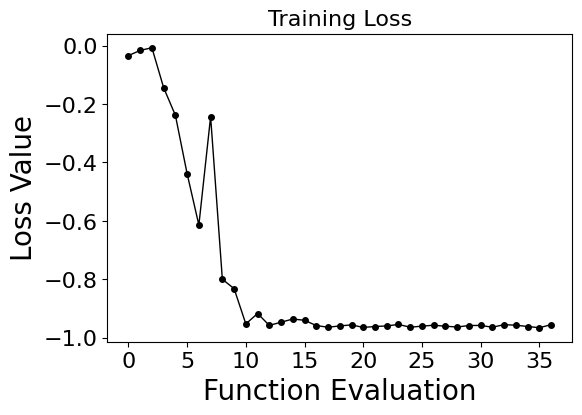

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import scipy.optimize as sp

def f(x):
   print(x)
   qc = QuantumCircuit(3, 3)
   qc.ry(np.pi/4, 0)
   qc.ry(np.pi/2, 1)
   qc.ry(np.pi/8, 2)
   qc.barrier()
   qc.ry(x[0], 0)
   qc.cx(0, 1)
   qc.ry(x[1], 1)
   qc.cx(0,2)
   
   # Recreate inverse instead of appending
   inverse_qc = qc.inverse()
   
   qc.barrier()
   qc.reset(1)
   qc.reset(2)
   
   # Add inverse gates manually
   qc.compose(inverse_qc, inplace=True)
   
   qc.measure([0,1,2], [0,1,2])
   
   simulator = AerSimulator()
   job = simulator.run(qc, shots=4096)
   result = job.result()
   counts = result.get_counts(qc)
   
   loss = counts.get('000', 0)/4096 * -1
   history.append(loss)
   return loss

history = []
result = sp.minimize(f, [np.pi/2, 0.], method='COBYLA', constraints={'type': 'ineq', 'fun': lambda x: 2. * np.pi - x})

plt.figure(figsize=(6, 4))
plt.plot(history, 'ko-', markersize=4, linewidth=1)
plt.title("Training Loss", fontsize=16)
plt.xlabel("Function Evaluation", fontsize=20)
plt.ylabel("Loss Value", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()